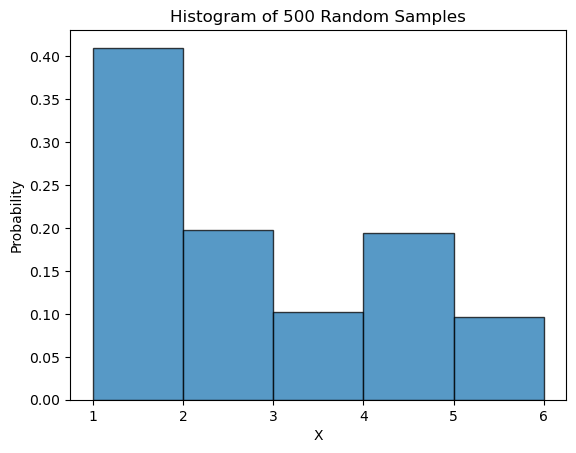

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Given pmf for X
values = np.array([1, 2, 3, 4, 5, 6])
pmf = np.array([0.1, 0.3, 0.2, 0.1, 0.2, 0.1])

# Cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Random samples from a uniform distribution
uniform_samples = np.random.rand(500)

# The inverse of the CDF to transform uniform samples into samples from the desired distribution
random_samples = np.interp(uniform_samples, cdf, values)

# Plotting the histogram
plt.hist(random_samples, bins=5, density=True, alpha=0.75, edgecolor='black')
plt.title('Histogram of 500 Random Samples')
plt.xlabel('X')
plt.ylabel('Probability')
plt.show()

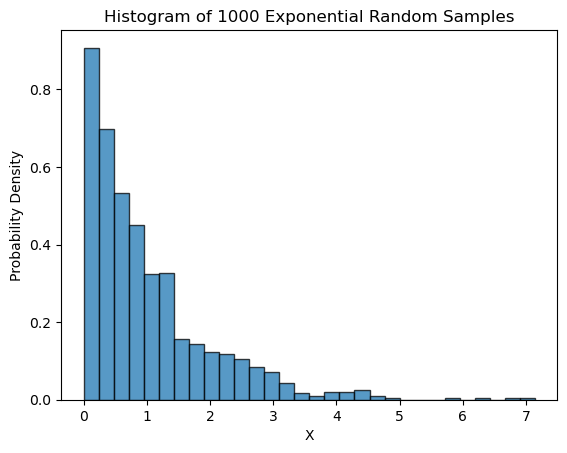

In [61]:
# Exponential distribution parameters
Lambda = 1

# Inverse of the CDF for exponential distribution
def inverse_cdf_exponential(u, l):
    return -np.log(1 - u) / l

# Random samples from a uniform distribution
uniform_samples = np.random.rand(1000)

# Applying the inverse of the CDF to transform uniform samples
exponential_samples = inverse_cdf_exponential(uniform_samples, Lambda)

# Plotting the histogram
plt.hist(exponential_samples, bins=30, density=True, alpha=0.75, edgecolor='black')
plt.title('Histogram of 1000 Exponential Random Samples')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()

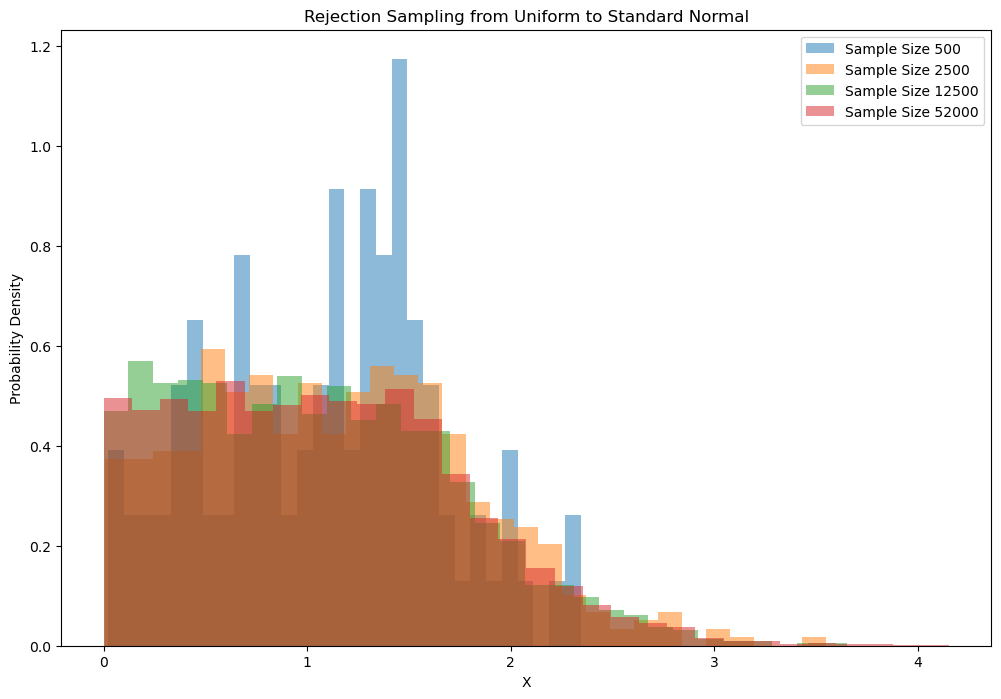

In [16]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

def rejection_sampling_uniform_to_normal(sample_size):
    accepted_samples = []
    rejected_samples = []

    for _ in range(sample_size):
        # Generating a sample from the proposed uniform distribution
        x = np.random.uniform(0, 10)  
        # Calculating the acceptance probability based on the standard normal distribution
        acceptance_prob = normal_dist(x , 0 , 1)
        if np.random.rand() < acceptance_prob:
            accepted_samples.append(x)
        else:
            rejected_samples.append(x)
    return accepted_samples, rejected_samples

# Varying sample sizes
sample_sizes = [500,1000,2500,12500,52000]

plt.figure(figsize=(12, 8))

for size in sample_sizes:
    accepted, rejected = rejection_sampling_uniform_to_normal(size)

    plt.hist(accepted, bins=30, density=True, alpha=0.5, label=f'Sample Size {size}')

plt.title('Rejection Sampling from Uniform to Standard Normal')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()
'''As the sample size increases, the histogram becomes smoother and converges towards the normal distribution. 
Larger sample sizes generally lead to more accurate approximations of the desired distribution.'''

In [71]:
# Define the parameters
sensitivity = 0.95
specificity = 0.90
prevalence =  0.01

# Number of simulations
num_simulations = 1000

# Initialize arrays to store results
positive_given_disease    = np.zeros(num_simulations)
positive_given_no_disease = np.zeros(num_simulations)

# Simulating the problem 
for i in range(num_simulations):
    has_disease = np.random.rand() < prevalence
    if has_disease:
        positive_given_disease[i] = np.random.rand() < sensitivity
    else:
        positive_given_no_disease[i] = np.random.rand() < (1 - specificity)
samples = np.count_nonzero(positive_given_disease == 1)+np.count_nonzero(positive_given_no_disease == 1)
disease_samples = np.count_nonzero(positive_given_disease == 1)
print(disease_samples)
# the robability that the person has the disease given a positive result
probability_estimation = disease_samples/samples;
print("Estimated probability that the person has the disease given a positive test result:", probability_estimation)

8
Estimated probability that the person has the disease given a positive test result: 0.07766990291262135
